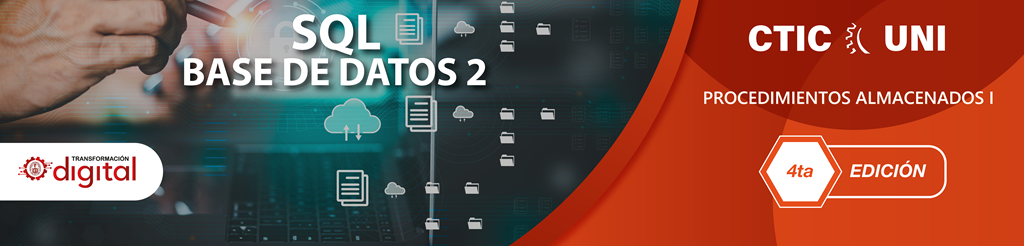

<table border=1 width='99%'>
<tr>
<td bgcolor='#AC2B24'>

# **<font color="#FFFFFF"> Módulo 1: Procedimientos Almacenados</font>**
</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> ¿Qué es un procedimiento almacenado?</font>**
</td>
</tr>
</table>

Un procedimiento almacenado es un conjunto de instrucciones T-SQL que se almacenan en la base de datos y que se pueden ejecutar de manera reutilizable.

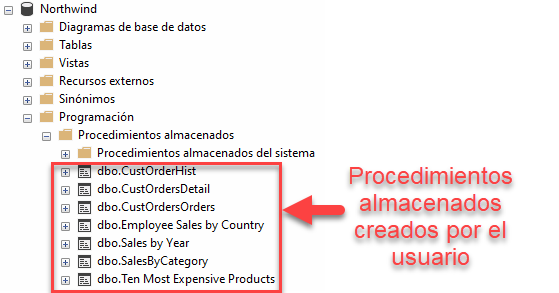

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Uso de variables en SQL Server</font>**
</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#CD3F27'>

### **<font color="#FFFFFF"> Declaración de Variable Simple </font>**
</td>
</tr>
</table>

Puedes declarar una variable usando la palabra clave DECLARE seguida del nombre de la variable y su tipo de datos.



```
/*
Mostrar la cantidad de beneficiarios menores de
un año al 31/07/2004
*/
DECLARE @N_0 AS INT;
SET @N_0 =
(
	SELECT COUNT(*)
	FROM Beneficiario
	WHERE
		CONVERT(INT,DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004) = 0
);
SELECT @N_0 AS [NIÑOS MENORES DE UN AÑO];
```





```
/*
Mostrar la cantidad de beneficiarios menores de
un año al 31/07/2004
*/
DECLARE @N_0 AS INT;

SELECT @N_0 = COUNT(*)
FROM Beneficiario
WHERE CONVERT(INT,DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004) = 0

SELECT @N_0 AS [NIÑOS MENORES DE UN AÑO];
```



<table width='99%'>
<tr>
<td bgcolor='#CD3F27'>

### **<font color="#FFFFFF"> Declaración de Variable y Asignación </font>**
</td>
</tr>
</table>

Puedes declarar y asignar un valor a una variable en una sola línea.



```
/*
Mostrar la cantidad de beneficiarios menores de
un año al 31/07/2004
*/
DECLARE @N_0 AS INT =
(
	SELECT COUNT(*)
	FROM Beneficiario
	WHERE
		CONVERT(INT,DATEDIFF(DAY, fec_nac_ben_da, '20040731')/365.256363004) = 0
);
SELECT @N_0 AS [NIÑOS MENORES DE UN AÑO];
```



<table width='99%'>
<tr>
<td bgcolor='#CD3F27'>

### **<font color="#FFFFFF"> Declaración de Variables Múltiples </font>**
</td>
</tr>
</table>

Puedes declarar múltiples variables del mismo tipo en una sola declaración.



```
DECLARE @N1 AS INT, @N2 AS INT, @N3 AS INT;

SET @N1 = 1 + RAND()*6;
SET @N2 = 1 + RAND()*6;
SET @N3 = 1 + RAND()*6;

SELECT
	@N1 AS Dado1,
	@N2 AS Dado2,
	@N3 AS Dado3;
```





```
DECLARE @N1 INT, @N2 INT, @N3 INT;

SET @N1 = 1 + RAND()*6;
SET @N2 = 1 + RAND()*6;
SET @N3 = 1 + RAND()*6;

SELECT
	@N1 AS Dado1,
	@N2 AS Dado2,
	@N3 AS Dado3;
```





```
-- 0 .. 0.999999
SELECT RAND()

-- 0 .. 5.99999
SELECT RAND()*6

-- 1 .. 6.99999
SELECT 1 + RAND()*6

-- 1 .. 6
SELECT CONVERT(INT, 1 + RAND()*6)
```



<table width='99%'>
<tr>
<td bgcolor='#CD3F27'>

### **<font color="#FFFFFF"> Declaración de Variables de Tipo Tabla </font>**
</td>
</tr>
</table>

Puedes declarar variables que actúan como tablas temporales.



```
USE Northwind
GO
DECLARE @T TABLE
(
	[ProductID] [int]  NOT NULL,
	[ProductName] [nvarchar](40) NOT NULL,
	[Categoría] [nvarchar](15) NULL,
	[UnitPrice] [money] NULL,
	[UnitsInStock] [smallint] NULL
)
INSERT INTO @T
SELECT
	ProductID,
	ProductName,
	(SELECT CategoryName FROM Categories WHERE CategoryID = p.CategoryID) AS Categoría,
	UnitPrice,
	UnitsInStock
FROM Products p;

SELECT * FROM @T;
```



<table width='99%'>
<tr>
<td bgcolor='#CD3F27'>

### **<font color="#FFFFFF"> Declaración de Variables de Tipo de Datos Específicos </font>**
</td>
</tr>
</table>

SQL Server permite declarar variables de tipos de datos específicos, como DATETIME, DECIMAL, etc.



```
DECLARE @Fecha DATETIME = GetDate()

SELECT @Fecha AS Fecha;
```





```
DECLARE @Día NVARCHAR(30) =
(
	SELECT DATENAME(WEEKDAY,'19961026')
)
SELECT @Día AS [El día que haz nacido];
```



<table width='99%'>
<tr>
<td bgcolor='#CD3F27'>

### **<font color="#FFFFFF"> Declaración de Variables en Procedimientos Almacenados </font>**
</td>
</tr>
</table>



```
USE pvl
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_beneficiario_cnt_x_comite'
)
DROP PROCEDURE usp_beneficiario_cnt_x_comite
GO
CREATE PROCEDURE usp_beneficiario_cnt_x_comite
(
	@cod_com_si SMALLINT
)
AS
BEGIN
	DECLARE @strSQL AS VARCHAR(500) = '''Cantidad de Beneficiarios del Comité ' + LTRIM(@cod_com_si) + '''';

	SET @strSQL = 'SELECT COUNT(*) AS ' + @strSQL + ' ';
	SET @strSQL += 'FROM Beneficiario '
	SET @strSQL += 'WHERE cod_com_si =  ' + LTRIM(@cod_com_si);

	EXECUTE(@strSQL);
END
GO
EXECUTE usp_beneficiario_cnt_x_comite 1000
GO

```



<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Procedimientos Almacenados Sin Parámetros</font>**
</td>
</tr>
</table>

Los procedimientos almacenados sin parámetros son aquellos que no requieren valores de entrada para ser ejecutados.

Estos procedimientos pueden ser utilizados para realizar tareas específicas, como consultar datos, realizar actualizaciones o ejecutar cálculos, sin necesidad de recibir información externa.



```
/*
Northwind: Procedimiento almacenado para consultar
el stock de los productos <= 10
*/
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_products_stock'
)
DROP PROCEDURE usp_products_stock
GO
CREATE PROCEDURE usp_products_stock
AS
BEGIN
	SELECT
		ProductID AS [Código del producto],
		ProductName AS Producto,
		UnitsInStock AS Stock
	FROM products
	WHERE UnitsInStock<=10
	ORDER BY 3 DESC
	RETURN 0
END
GO
DECLARE @ERROR AS INT
EXEC @ERROR = usp_products_stock

SELECT @ERROR AS Error
GO
```



<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Procedimientos Almacenados con un parámetro</font>**
</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#CD3F27'>

### **<font color="#FFFFFF"> Sentencia de control IF</font>**
</td>
</tr>
</table>

La sentencia de control IF en SQL Server 2022 se utiliza para ejecutar una instrucción o un bloque de instrucciones condicionalmente, dependiendo de si una condición específica se evalúa como verdadera o falsa.

Esta estructura es útil para implementar lógica de control en tus scripts SQL, como en procedimientos almacenados o scripts de mantenimiento.

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

#### **<font color="#000000"> Sintaxis 1</font>**
</td>
</tr>
</table>



```
IF (Condición)
  -- Sentencia a ejecutarse si la condición es verdadera
ELSE
  -- Sentencia a ejecutarse si la condición es falsa
```



<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

#### **<font color="#000000"> Sintaxis 2</font>**
</td>
</tr>
</table>



```
IF (Condición)
BEGIN
  -- Sentencia 1 a ejecutarse si la condición es verdadera
  -- Sentencia 2 a ejecutarse si la condición es verdadera
  -- ...
  -- Sentencia N a ejecutarse si la condición es verdadera
END
ELSE
BEGIN
  -- Sentencia 1 a ejecutarse si la condición es falsa
  -- Sentencia 2 a ejecutarse si la condición es falsa
  -- ...
  -- Sentencia N a ejecutarse si la condición es falsa
END
```





```
USE pvl
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_beneficiario_consulta'
)
DROP PROCEDURE usp_beneficiario_consulta
GO
CREATE PROCEDURE usp_beneficiario_consulta
(
	@parametro AS VARCHAR(115) = NULL
)
AS
BEGIN
	IF @parametro IS NULL
		SELECT TOP 10
			cod_ben_in AS [Código del beneficiario],
			(
				SELECT Comité = CONCAT(nom_cen_aco_vc, ' - ' ,nom_pue_vc, ' - ' , nom_com_vc)
				FROM CentroAcopio ca
				INNER JOIN Pueblo p
				ON ca.cod_cen_aco_ti = p.cod_cen_aco_ti
				INNER JOIN Comite c
				ON p.cod_pue_si = c.cod_pue_si
				WHERE cod_com_si = b.cod_com_si
			) AS Comité,
			pat_ben_vc AS Paterno,
			mat_ben_vc AS Materno,
			nom_ben_vc AS Nombres,
			dni_ben_ch AS DNI,
			CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
			CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731') / 365.256363004) AS Edad,
			IIF(cod_sex_bi=0, 'FEMENINO', 'MASCULINO') AS Sexo
		FROM Beneficiario b
	ELSE
	IF ISNUMERIC(@parametro) = 1 AND @parametro NOT LIKE ('[0-9][0-9][0-9][0-9][0-9][0-9][0-9][0-9]')
		SELECT TOP 50
			cod_ben_in AS [Código del beneficiario],
			(
				SELECT Comité = CONCAT(nom_cen_aco_vc, ' - ' ,nom_pue_vc, ' - ' , nom_com_vc)
				FROM CentroAcopio ca
				INNER JOIN Pueblo p
				ON ca.cod_cen_aco_ti = p.cod_cen_aco_ti
				INNER JOIN Comite c
				ON p.cod_pue_si = c.cod_pue_si
				WHERE cod_com_si = b.cod_com_si
			) AS Comité,
			pat_ben_vc AS Paterno,
			mat_ben_vc AS Materno,
			nom_ben_vc AS Nombres,
			dni_ben_ch AS DNI,
			CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
			CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731') / 365.256363004) AS Edad,
			IIF(cod_sex_bi=0, 'FEMENINO', 'MASCULINO') AS Sexo
		FROM Beneficiario b
		WHERE cod_ben_in = @parametro
	ELSE
	IF @parametro LIKE ('[0-9][0-9][0-9][0-9][0-9][0-9][0-9][0-9]')
		SELECT
			cod_ben_in AS [Código del beneficiario],
			(
				SELECT Comité = CONCAT(nom_cen_aco_vc, ' - ' ,nom_pue_vc, ' - ' , nom_com_vc)
				FROM CentroAcopio ca
				INNER JOIN Pueblo p
				ON ca.cod_cen_aco_ti = p.cod_cen_aco_ti
				INNER JOIN Comite c
				ON p.cod_pue_si = c.cod_pue_si
				WHERE cod_com_si = b.cod_com_si
			) AS Comité,
			pat_ben_vc AS Paterno,
			mat_ben_vc AS Materno,
			nom_ben_vc AS Nombres,
			dni_ben_ch AS DNI,
			CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
			CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731') / 365.256363004) AS Edad,
			IIF(cod_sex_bi=0, 'FEMENINO', 'MASCULINO') AS Sexo
		FROM Beneficiario b
		WHERE dni_ben_ch = @parametro
	ELSE
	IF @parametro LIKE ('[0-9][0-9]/[0-9][0-9]/[0-9][0-9][0-9][0-9]') AND ISDATE(@parametro) = 1
		SELECT
			cod_ben_in AS [Código del beneficiario],
			(
				SELECT Comité = CONCAT(nom_cen_aco_vc, ' - ' ,nom_pue_vc, ' - ' , nom_com_vc)
				FROM CentroAcopio ca
				INNER JOIN Pueblo p
				ON ca.cod_cen_aco_ti = p.cod_cen_aco_ti
				INNER JOIN Comite c
				ON p.cod_pue_si = c.cod_pue_si
				WHERE cod_com_si = b.cod_com_si
			) AS Comité,
			pat_ben_vc AS Paterno,
			mat_ben_vc AS Materno,
			nom_ben_vc AS Nombres,
			dni_ben_ch AS DNI,
			CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
			CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731') / 365.256363004) AS Edad,
			IIF(cod_sex_bi=0, 'FEMENINO', 'MASCULINO') AS Sexo
		FROM Beneficiario b
		WHERE fec_nac_ben_da = CONVERT(DATE, @parametro, 103)
	ELSE
		SELECT
			cod_ben_in AS [Código del beneficiario],
			(
				SELECT Comité = CONCAT(nom_cen_aco_vc, ' - ' ,nom_pue_vc, ' - ' , nom_com_vc)
				FROM CentroAcopio ca
				INNER JOIN Pueblo p
				ON ca.cod_cen_aco_ti = p.cod_cen_aco_ti
				INNER JOIN Comite c
				ON p.cod_pue_si = c.cod_pue_si
				WHERE cod_com_si = b.cod_com_si
			) AS Comité,
			pat_ben_vc AS Paterno,
			mat_ben_vc AS Materno,
			nom_ben_vc AS Nombres,
			dni_ben_ch AS DNI,
			CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
			CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731') / 365.256363004) AS Edad,
			IIF(cod_sex_bi=0, 'FEMENINO', 'MASCULINO') AS Sexo
		FROM Beneficiario b
		WHERE CONCAT(pat_ben_vc, SPACE(1), mat_ben_vc, SPACE(1), nom_ben_vc) LIKE @parametro + '%'
	RETURN 0;
END
GO
usp_beneficiario_consulta 'quispe quispe c'
GO
```



<table width='99%'>
<tr>
<td bgcolor='#CD3F27'>

### **<font color="#FFFFFF"> Instalación de Visual Studio 2022 Community</font>**
</td>
</tr>
</table>

[Sitio web oficial de descarga de Visual Studio 2022 Community](https://visualstudio.microsoft.com/es/vs/community/)

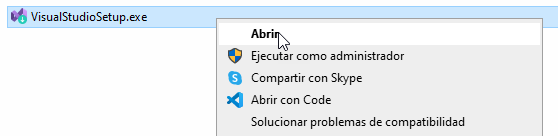

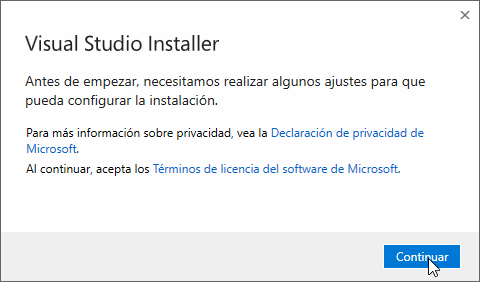

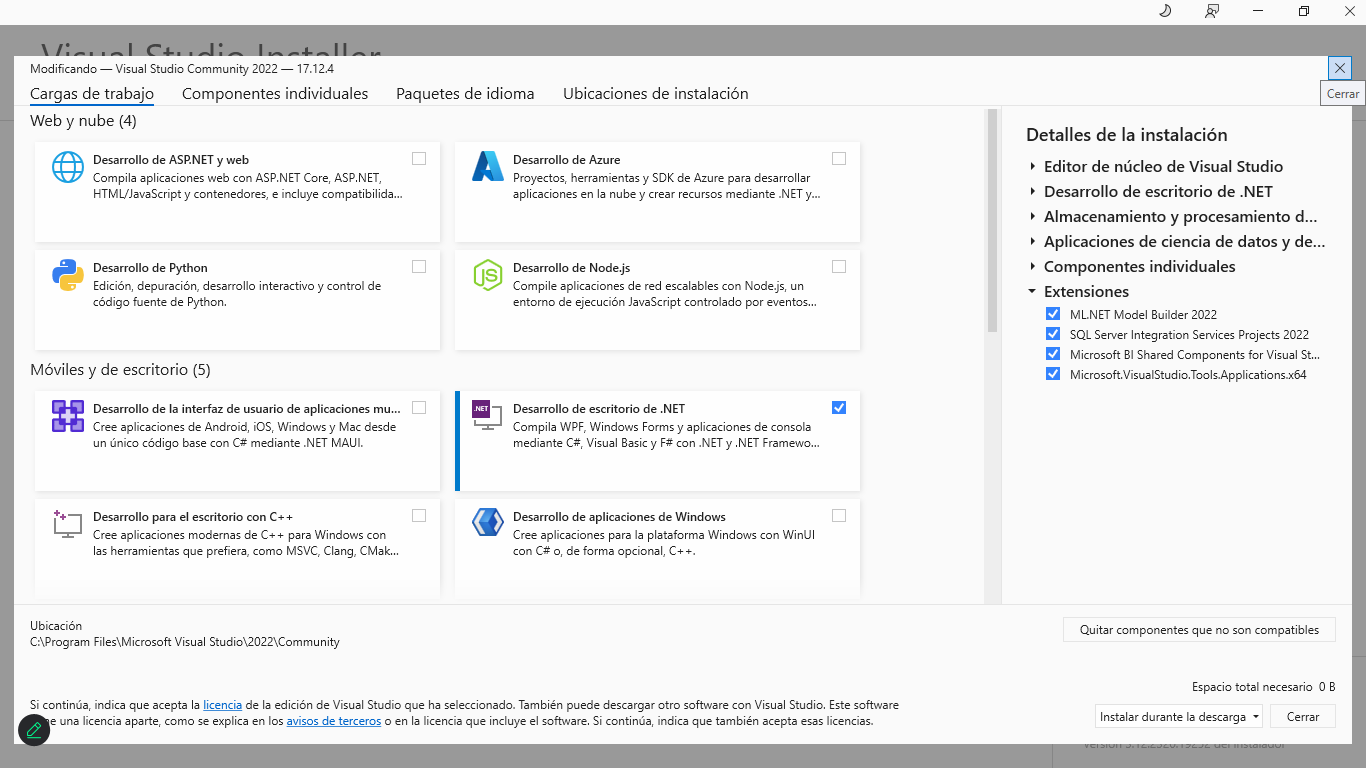

<table width='99%'>
<tr>
<td bgcolor='#CD3F27'>

### **<font color="#FFFFFF"> Creación del Proyecto de Prueba del Procedimiento Almacenado</font>**
</td>
</tr>
</table>

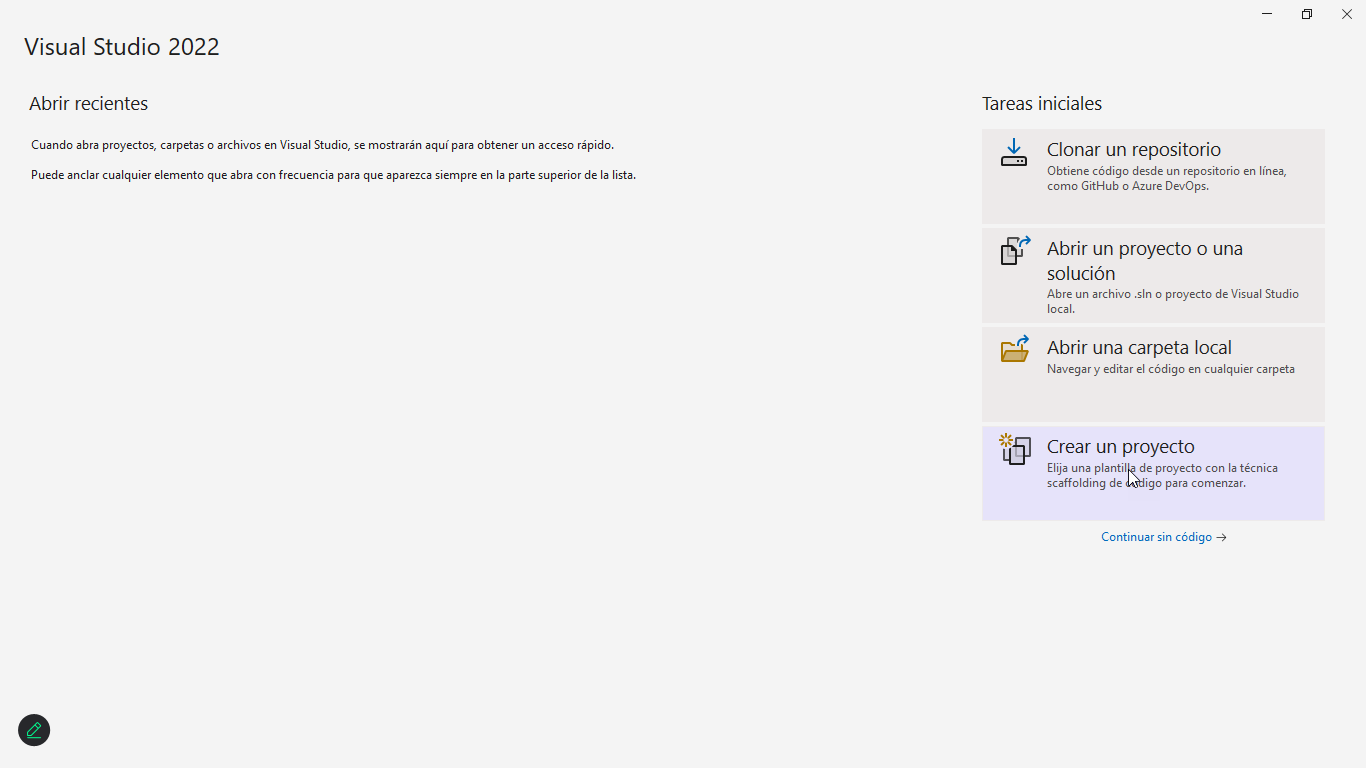

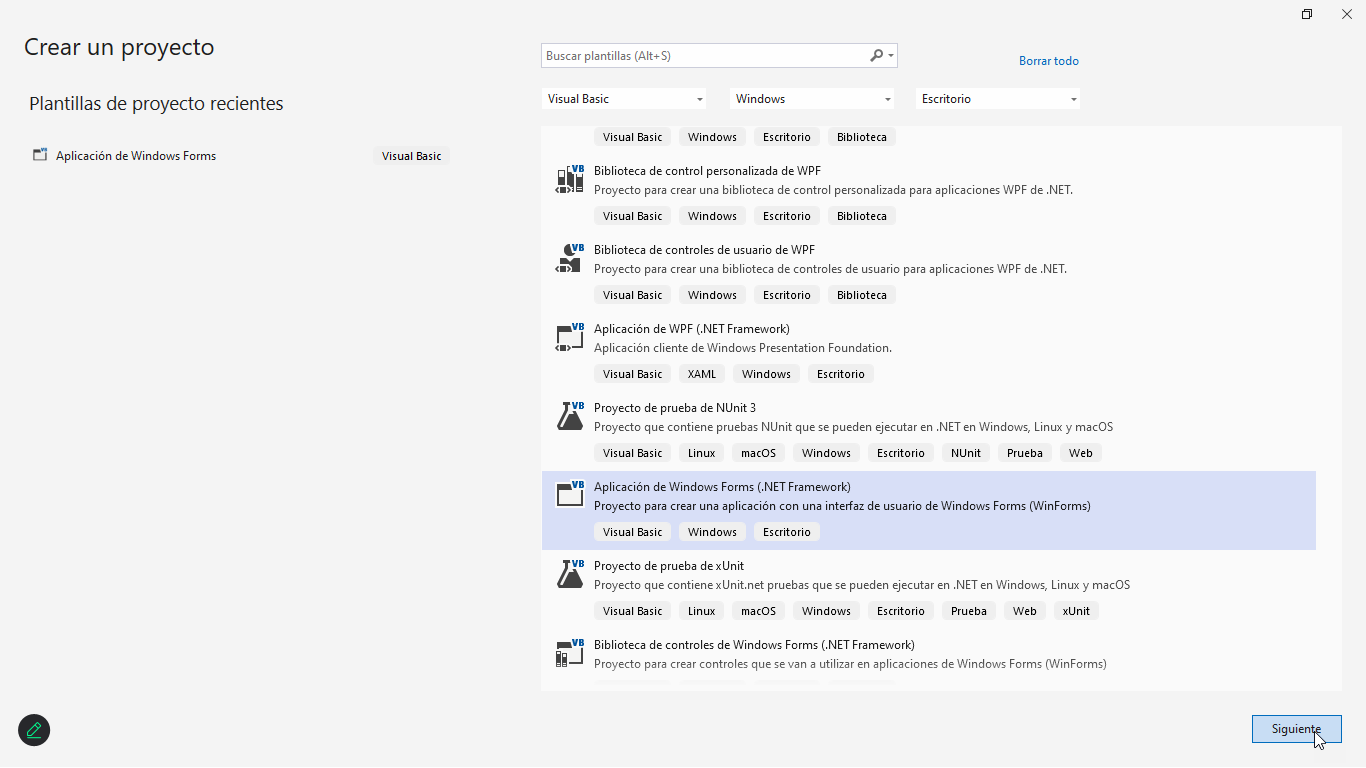

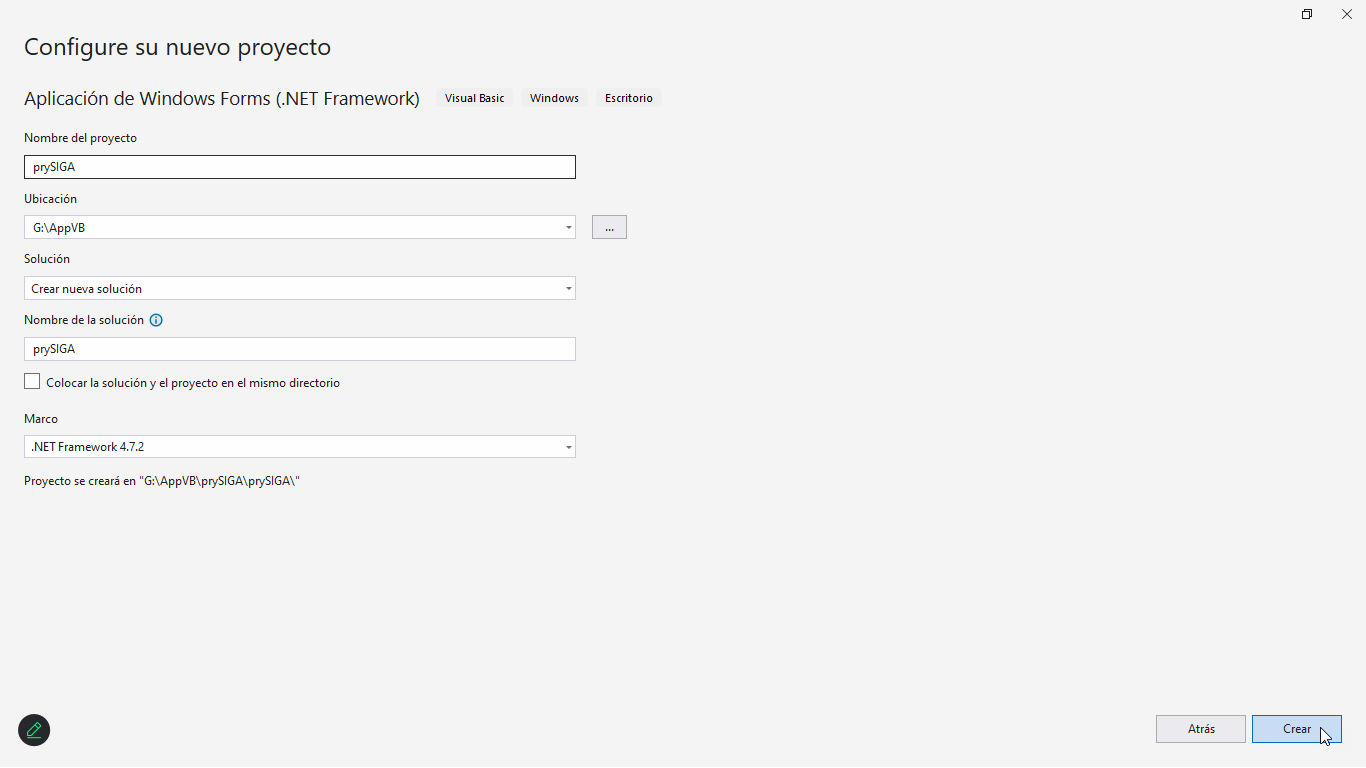

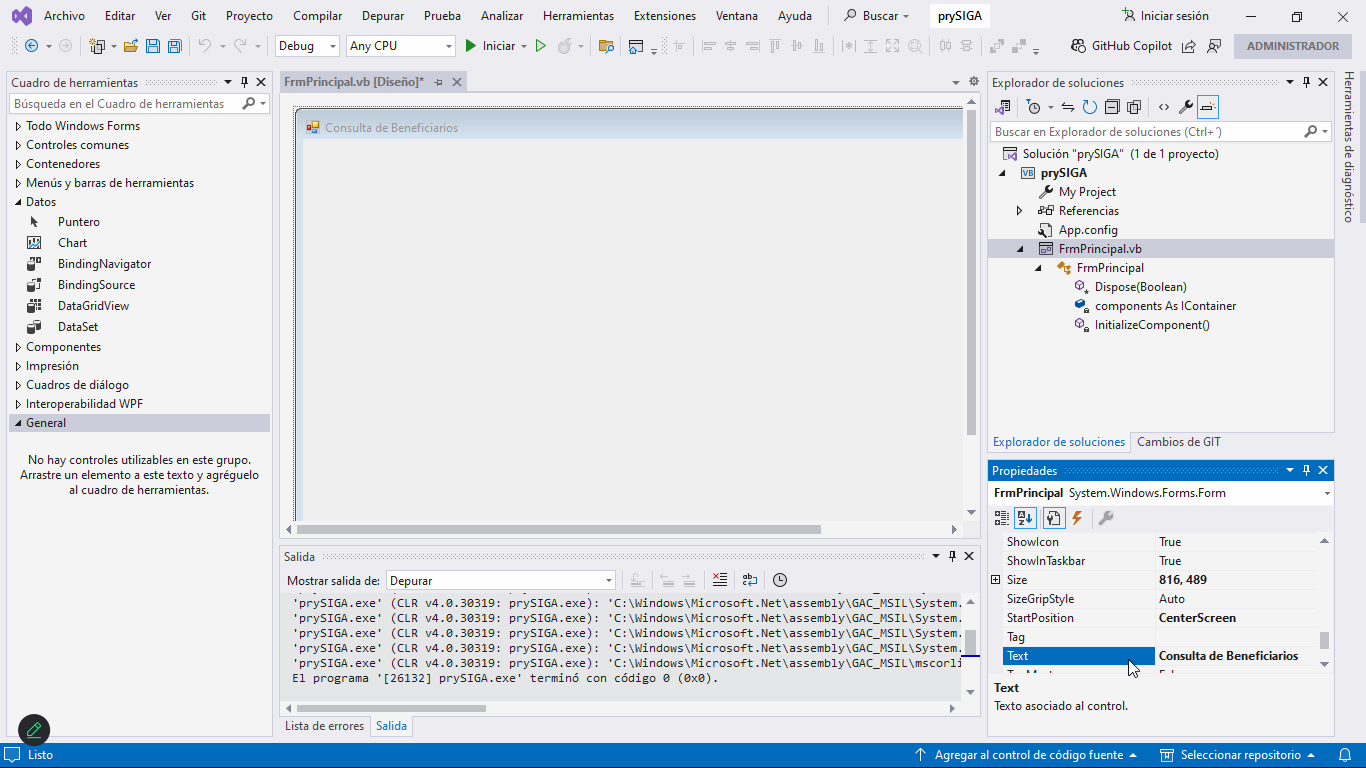

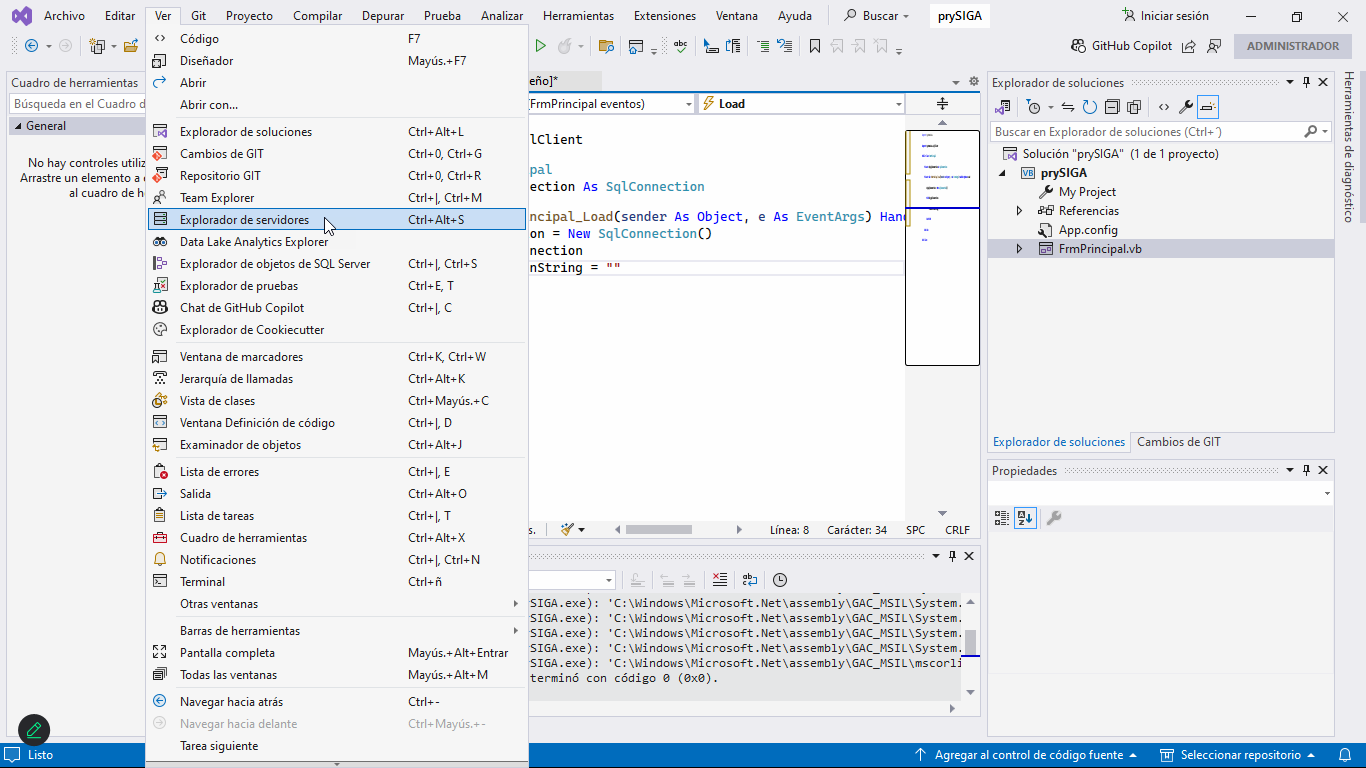

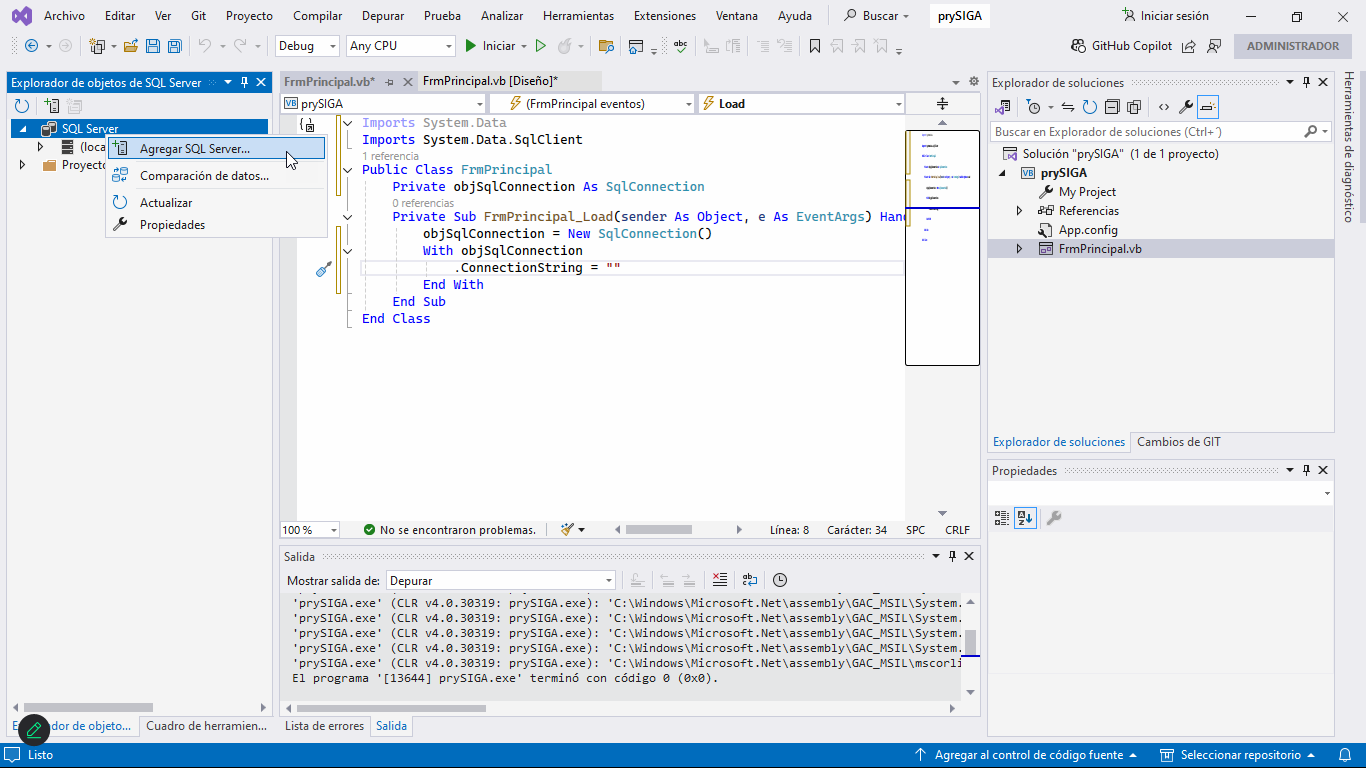



```
Imports System.Data
Imports System.Data.SqlClient
Public Class FrmPrincipal
    Private objSqlConnection As SqlConnection
    Private Sub FrmPrincipal_Load(sender As Object, e As EventArgs) Handles MyBase.Load
        objSqlConnection = New SqlConnection()
        With objSqlConnection
            .ConnectionString = "Data Source=server;Initial Catalog=pvl;Integrated Security=True;Persist Security Info=False;Pooling=False;Encrypt=True;TrustServerCertificate=True;"
            .Open()
            MessageBox.Show(.State.ToString)
        End With
    End Sub
End Class
```



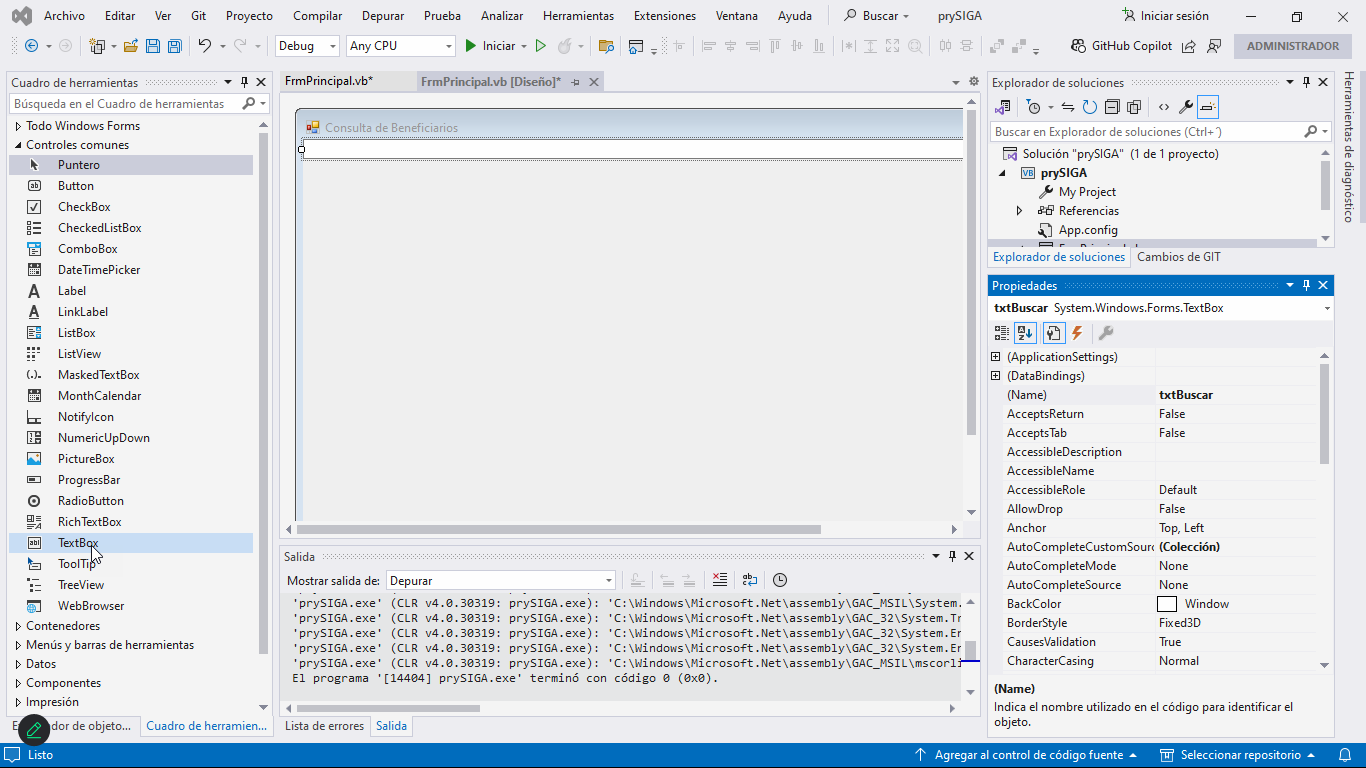

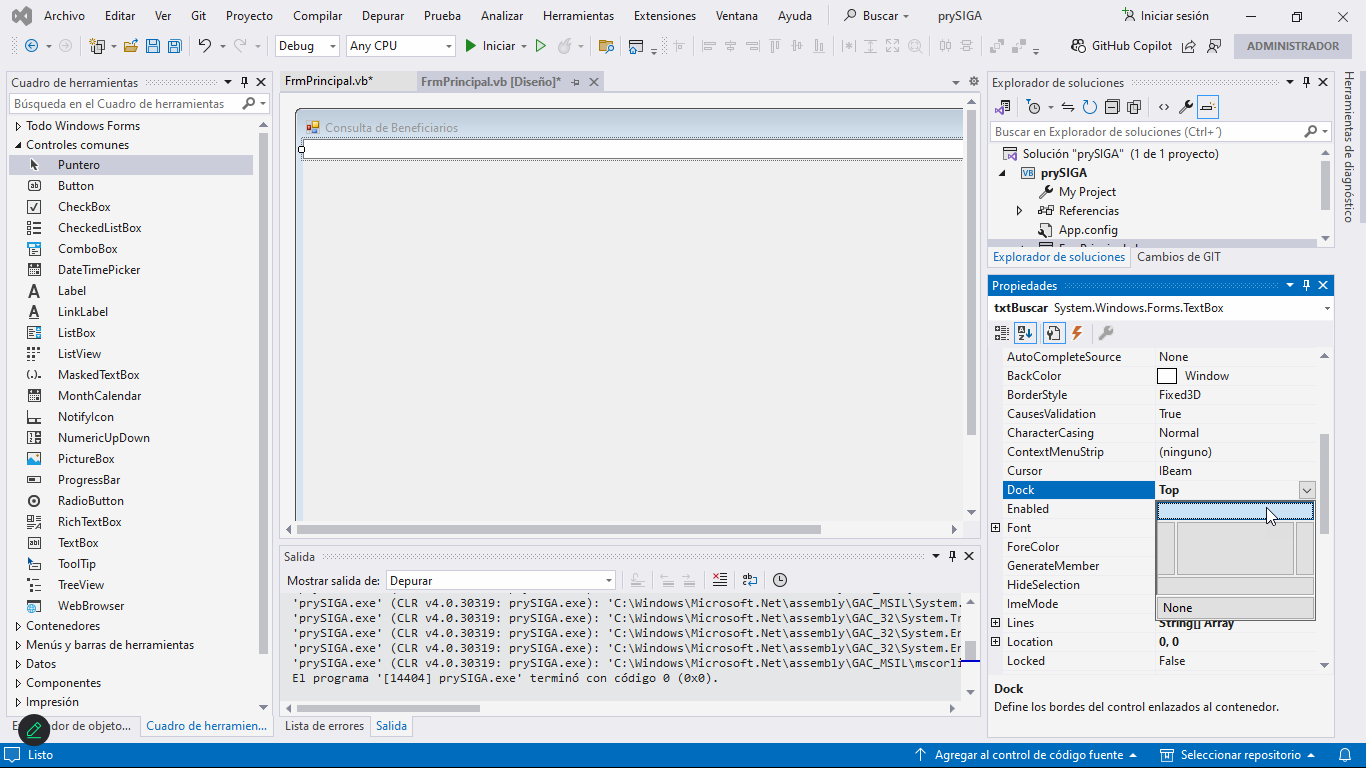

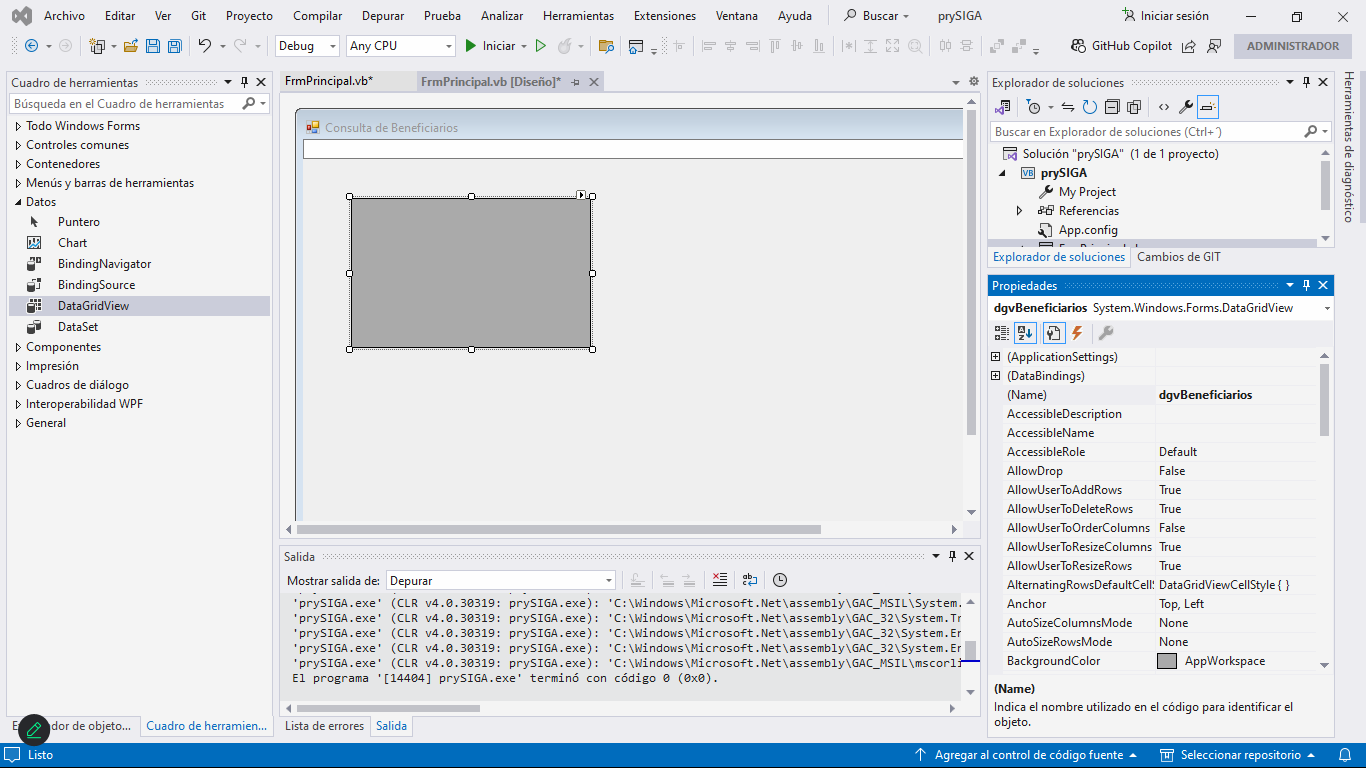

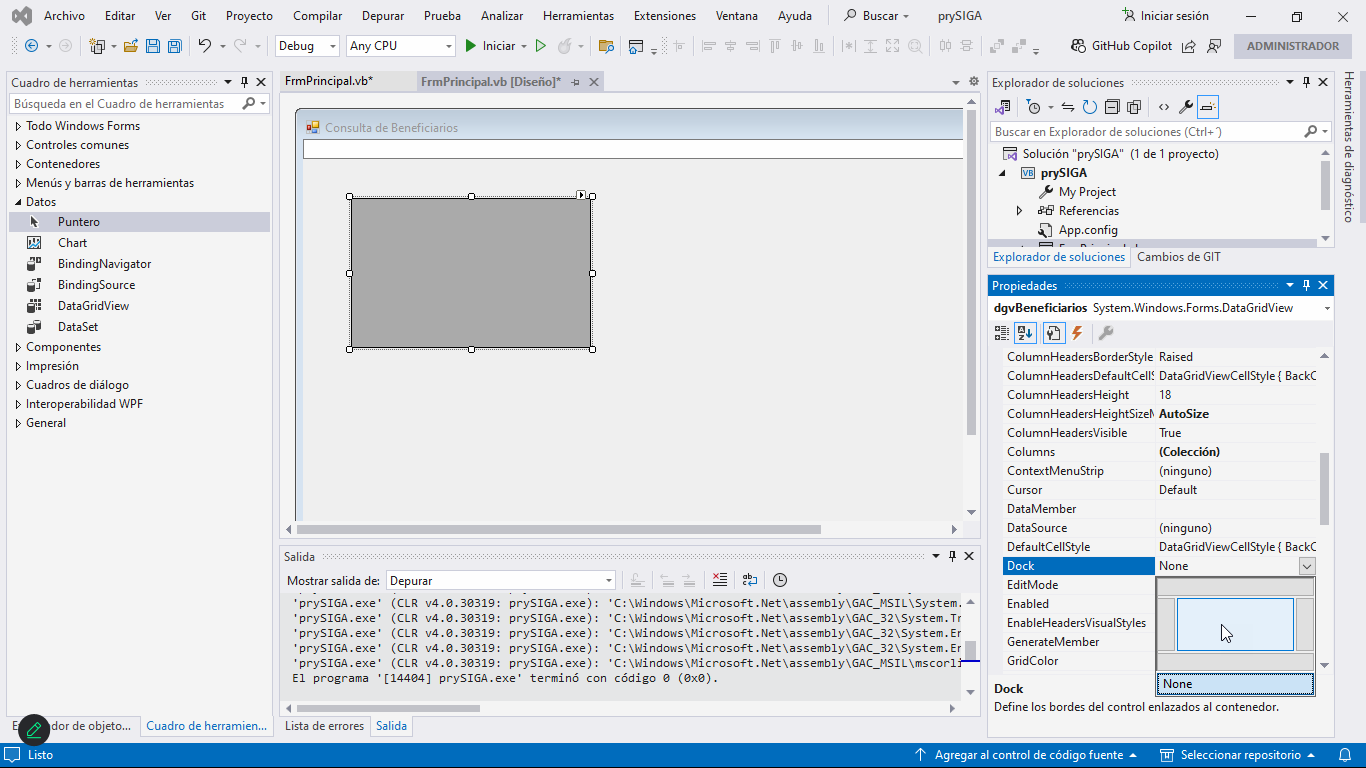

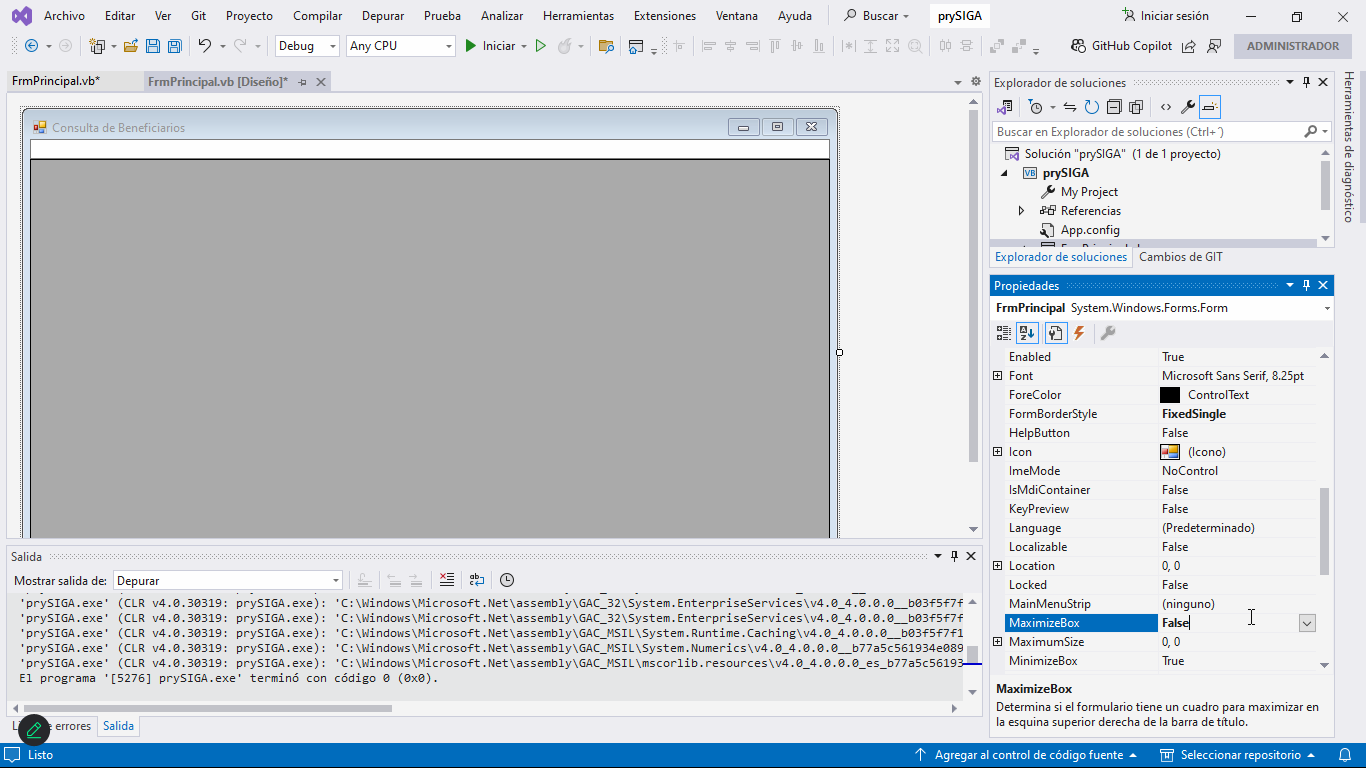

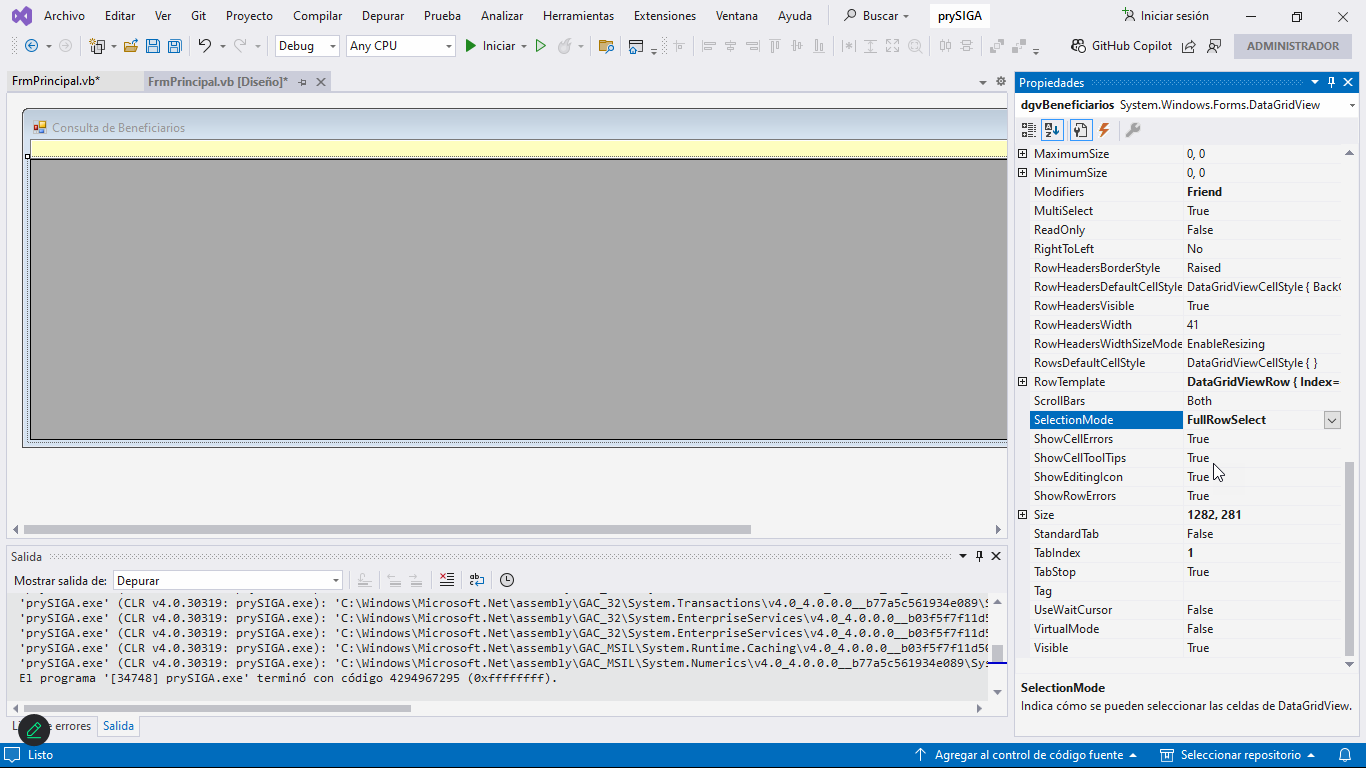

<table width='99%'>
<tr>
<td bgcolor='#CD3F27'>

### **<font color="#FFFFFF"> Programa en Visual Basic 2022</font>**
</td>
</tr>
</table>



```
Imports System.Data
Imports System.Data.SqlClient
Public Class FrmPrincipal
    Private objSqlConnection As SqlConnection
    Private Sub FrmPrincipal_Load(sender As Object, e As EventArgs) Handles MyBase.Load
        Buscar()
    End Sub
    Private Sub Buscar()
        objSqlConnection = New SqlConnection()

        With objSqlConnection
            .ConnectionString = "Data Source=server;Initial Catalog=pvl;Integrated Security=True;Persist Security Info=False;Pooling=False;Encrypt=True;TrustServerCertificate=True;"
            .Open()
        End With
        Dim objSqlCommand As New SqlCommand
        Dim objSqlParameter As New SqlParameter("@parametro", Me.txtBuscar.Text().Trim())
        With objSqlCommand
            .Connection = objSqlConnection
            .CommandText = "usp_beneficiario_consulta"
            .CommandType = CommandType.StoredProcedure
            .Parameters.Add(objSqlParameter)
            .ExecuteNonQuery()
        End With
        Dim objSqlDataAdapter As New SqlDataAdapter(objSqlCommand)
        Dim objDataTable As New DataTable
        objSqlDataAdapter.Fill(objDataTable)

        With Me.dgvBeneficiarios
            .DataSource = objDataTable
            .AllowDrop = False
            .AllowUserToAddRows = False
            .AllowUserToDeleteRows = False
            .AllowUserToOrderColumns = False
            .AllowUserToResizeColumns = False
            .AllowUserToResizeRows = False
            .EditMode = DataGridViewEditMode.EditProgrammatically
            .Columns(0).Width = 50
            .Columns(1).Width = 400
            .Columns(2).Width = 120
            .Columns(3).Width = 120
            .Columns(4).Width = 120
            .Columns(5).Width = 70
            .Columns(6).Width = 80
            .Columns(7).Width = 50
            .Columns(8).Width = 100
        End With


    End Sub

    Private Sub txtBuscar_TextChanged(sender As Object, e As EventArgs) Handles txtBuscar.TextChanged
        Buscar()
    End Sub
End Class
```



<table width='99%'>
<tr>
<td bgcolor='#CD3F27'>

### **<font color="#FFFFFF"> Procedimiento Almacenado en SQL Server</font>**
</td>
</tr>
</table>



```
USE pvl
GO
IF EXISTS
(
    SELECT name
    FROM sys.procedures
    WHERE name = 'usp_beneficiario_consulta'
)
DROP PROCEDURE usp_beneficiario_consulta
GO
CREATE PROCEDURE usp_beneficiario_consulta
(
    @parametro AS VARCHAR(115) = NULL
)
AS
BEGIN
    IF @parametro IS NULL OR LEN(TRIM(@parametro))=0
        SELECT TOP 10
            cod_ben_in AS Código,
            (
                SELECT Comité = CONCAT(nom_cen_aco_vc, ' - ' ,nom_pue_vc, ' - ' , nom_com_vc)
                FROM CentroAcopio ca
                INNER JOIN Pueblo p
                ON ca.cod_cen_aco_ti = p.cod_cen_aco_ti
                INNER JOIN Comite c
                ON p.cod_pue_si = c.cod_pue_si
                WHERE cod_com_si = b.cod_com_si
            ) AS Comité,
            pat_ben_vc AS Paterno,
            mat_ben_vc AS Materno,
            nom_ben_vc AS Nombres,
            dni_ben_ch AS DNI,
            CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
            CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731') / 365.256363004) AS Edad,
            IIF(cod_sex_bi=0, 'FEMENINO', 'MASCULINO') AS Sexo
        FROM Beneficiario b
    ELSE
    IF ISNUMERIC(@parametro) = 1 AND @parametro NOT LIKE ('[0-9][0-9][0-9][0-9][0-9][0-9][0-9][0-9]')
        SELECT TOP 50
            cod_ben_in AS Código,
            (
                SELECT Comité = CONCAT(nom_cen_aco_vc, ' - ' ,nom_pue_vc, ' - ' , nom_com_vc)
                FROM CentroAcopio ca
                INNER JOIN Pueblo p
                ON ca.cod_cen_aco_ti = p.cod_cen_aco_ti
                INNER JOIN Comite c
                ON p.cod_pue_si = c.cod_pue_si
                WHERE cod_com_si = b.cod_com_si
            ) AS Comité,
            pat_ben_vc AS Paterno,
            mat_ben_vc AS Materno,
            nom_ben_vc AS Nombres,
            dni_ben_ch AS DNI,
            CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
            CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731') / 365.256363004) AS Edad,
            IIF(cod_sex_bi=0, 'FEMENINO', 'MASCULINO') AS Sexo
        FROM Beneficiario b
        WHERE cod_ben_in = @parametro
    ELSE
    IF @parametro LIKE ('[0-9][0-9][0-9][0-9][0-9][0-9][0-9][0-9]')
        SELECT
            cod_ben_in AS Código,
            (
                SELECT Comité = CONCAT(nom_cen_aco_vc, ' - ' ,nom_pue_vc, ' - ' , nom_com_vc)
                FROM CentroAcopio ca
                INNER JOIN Pueblo p
                ON ca.cod_cen_aco_ti = p.cod_cen_aco_ti
                INNER JOIN Comite c
                ON p.cod_pue_si = c.cod_pue_si
                WHERE cod_com_si = b.cod_com_si
            ) AS Comité,
            pat_ben_vc AS Paterno,
            mat_ben_vc AS Materno,
            nom_ben_vc AS Nombres,
            dni_ben_ch AS DNI,
            CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
            CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731') / 365.256363004) AS Edad,
            IIF(cod_sex_bi=0, 'FEMENINO', 'MASCULINO') AS Sexo
        FROM Beneficiario b
        WHERE dni_ben_ch = @parametro
    ELSE
    IF @parametro LIKE ('[0-9][0-9]/[0-9][0-9]/[0-9][0-9][0-9][0-9]') AND ISDATE(@parametro) = 1
        SELECT
            cod_ben_in AS Código,
            (
                SELECT Comité = CONCAT(nom_cen_aco_vc, ' - ' ,nom_pue_vc, ' - ' , nom_com_vc)
                FROM CentroAcopio ca
                INNER JOIN Pueblo p
                ON ca.cod_cen_aco_ti = p.cod_cen_aco_ti
                INNER JOIN Comite c
                ON p.cod_pue_si = c.cod_pue_si
                WHERE cod_com_si = b.cod_com_si
            ) AS Comité,
            pat_ben_vc AS Paterno,
            mat_ben_vc AS Materno,
            nom_ben_vc AS Nombres,
            dni_ben_ch AS DNI,
            CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
            CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731') / 365.256363004) AS Edad,
            IIF(cod_sex_bi=0, 'FEMENINO', 'MASCULINO') AS Sexo
        FROM Beneficiario b
        WHERE fec_nac_ben_da = CONVERT(DATE, @parametro, 103)
    ELSE
        SELECT
            cod_ben_in AS Código,
            (
                SELECT Comité = CONCAT(nom_cen_aco_vc, ' - ' ,nom_pue_vc, ' - ' , nom_com_vc)
                FROM CentroAcopio ca
                INNER JOIN Pueblo p
                ON ca.cod_cen_aco_ti = p.cod_cen_aco_ti
                INNER JOIN Comite c
                ON p.cod_pue_si = c.cod_pue_si
                WHERE cod_com_si = b.cod_com_si
            ) AS Comité,
            pat_ben_vc AS Paterno,
            mat_ben_vc AS Materno,
            nom_ben_vc AS Nombres,
            dni_ben_ch AS DNI,
            CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [Fecha de Nacimiento],
            CONVERT(INT, DATEDIFF(DAY, fec_nac_ben_da, '20040731') / 365.256363004) AS Edad,
            IIF(cod_sex_bi=0, 'FEMENINO', 'MASCULINO') AS Sexo
        FROM Beneficiario b
        WHERE CONCAT(pat_ben_vc, SPACE(1), mat_ben_vc, SPACE(1), nom_ben_vc) LIKE @parametro + '%'
    RETURN 0;
END
GO
usp_beneficiario_consulta 'quispe quispe c'
GO

```



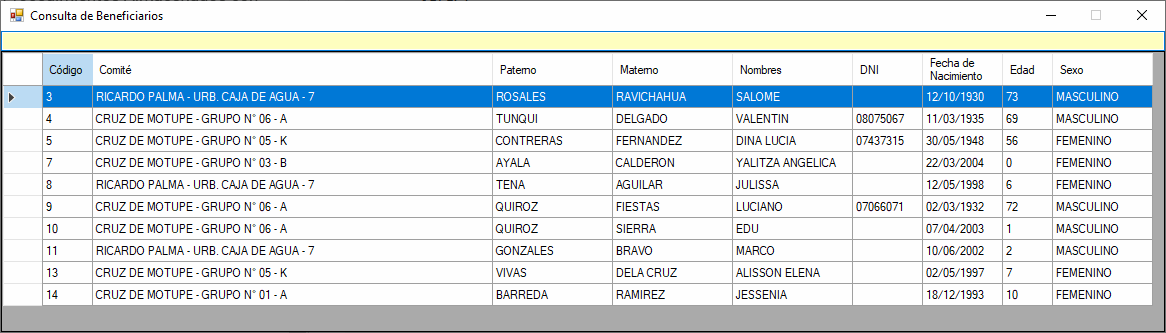



```
USE pvl
GO
IF EXISTS
(
	SELECT name
	FROM sys.indexes
	WHERE name = 'ix_beneficiario_dni_ben_ch'
)
DROP INDEX ix_beneficiario_dni_ben_ch
ON Beneficiario
GO
CREATE INDEX ix_beneficiario_dni_ben_ch
ON Beneficiario(dni_ben_ch)
GO
CREATE INDEX ix_beneficiario_dni_ben_ch
ON Beneficiario(dni_ben_ch)
WITH
(
	FILLFACTOR = 70,
      PAD_INDEX = ON,
      DROP_EXISTING = ON);
GO
```



<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Procedimientos Almacenados con parámetros de Entrada y parámetros de Salida</font>**
</td>
</tr>
</table>



```
/*
	Crear un procedimiento almacenedado que permita ingresar un número entero
	entre 1 y 3999 y me devuelva dicho número en números romanos.
*/
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_num_rom'
)
DROP PROCEDURE usp_num_rom
GO
CREATE PROCEDURE usp_num_rom
(
	@n INT
)
AS
BEGIN
	DECLARE  @m INT
	DECLARE  @c INT
	DECLARE  @d INT
	DECLARE  @u INT

	PRINT CONCAT('N:', @n)

	SET @m = @n / 1000;
	SET @n %= 1000;
	PRINT CONCAT('M:', @m)
	PRINT CONCAT('N:', @n)

	SET @c = @n / 100;
	SET @n %= 100;

	PRINT CONCAT('C:', @c)
	PRINT CONCAT('N:', @n)

	SET @d = @n / 10;
	SET @u = @n % 10;

	PRINT CONCAT('D:', @d)
	PRINT CONCAT('U:', @u)
	PRINT CONCAT('N:', @n)


	RETURN 0
END
GO
usp_num_rom 1234
GO
```





```
/*
	Crear un procedimiento almacenedado que permita ingresar un número entero
	entre 1 y 3999 y me devuelva dicho número en números romanos.
*/
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_num_rom'
)
DROP PROCEDURE usp_num_rom
GO
CREATE PROCEDURE usp_num_rom
(
	@n INT,
	@strRom VARCHAR(200)  = '' OUTPUT
)
AS
BEGIN
	DECLARE  @m INT
	DECLARE  @c INT
	DECLARE  @d INT
	DECLARE  @u INT

	SET @m = @n / 1000;
	SET @n %= 1000;

	SET @c = @n / 100;
	SET @n %= 100;

	SET @d = @n / 10;
	SET @u = @n % 10;

	SET @strRom =
	(
		SELECT
			CASE @m
				WHEN 1 THEN 'M'
				WHEN 2 THEN 'MM'
				WHEN 3 THEN 'MMM'
				ELSE ''
			END
	)
	SET @strRom +=
	(
		SELECT
			CASE @c
				WHEN 1 THEN 'C'
				WHEN 2 THEN 'CC'
				WHEN 3 THEN 'CCC'
				WHEN 4 THEN 'CD'
				WHEN 5 THEN 'D'
				WHEN 6 THEN 'DC'
				WHEN 7 THEN 'DCC'
				WHEN 8 THEN 'DCCC'
				WHEN 9 THEN 'CM'
				ELSE ''
			END
	)
	SET @strRom +=
	(
		SELECT
			CASE @d
				WHEN 1 THEN 'X'
				WHEN 2 THEN 'XX'
				WHEN 3 THEN 'XXX'
				WHEN 4 THEN 'XL'
				WHEN 5 THEN 'L'
				WHEN 6 THEN 'LX'
				WHEN 7 THEN 'LXX'
				WHEN 8 THEN 'LXXX'
				WHEN 9 THEN 'XC'
				ELSE ''
			END
	)
	SET @strRom +=
	(
		SELECT
			CASE @u
				WHEN 1 THEN 'I'
				WHEN 2 THEN 'II'
				WHEN 3 THEN 'III'
				WHEN 4 THEN 'IV'
				WHEN 5 THEN 'V'
				WHEN 6 THEN 'VI'
				WHEN 7 THEN 'VII'
				WHEN 8 THEN 'VIII'
				WHEN 9 THEN 'IX'
				ELSE ''
			END
	)

	RETURN 0
END
GO
DECLARE @rom AS VARCHAR(200);

EXECUTE usp_num_rom 1234, @rom OUTPUT

SELECT @rom AS [EN ROMANOS]
GO
```





```
/*
	Crear un procedimiento almacenedado que permita ingresar un número entero
	entre 1 y 3999 y me devuelva dicho número en números romanos.
*/
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_num_rom'
)
DROP PROCEDURE usp_num_rom
GO
CREATE PROCEDURE usp_num_rom
(
	@n INT,
	@strRom VARCHAR(200)  = '' OUTPUT
)
AS
BEGIN
	IF @n >= 1 AND @n<= 3999
	BEGIN
		DECLARE  @m INT
		DECLARE  @c INT
		DECLARE  @d INT
		DECLARE  @u INT

		SET @m = @n / 1000;
		SET @n %= 1000;

		SET @c = @n / 100;
		SET @n %= 100;

		SET @d = @n / 10;
		SET @u = @n % 10;

		SET @strRom =
		(
			SELECT
				CASE @m
					WHEN 1 THEN 'M'
					WHEN 2 THEN 'MM'
					WHEN 3 THEN 'MMM'
					ELSE ''
				END
		)
		SET @strRom +=
		(
			SELECT
				CASE @c
					WHEN 1 THEN 'C'
					WHEN 2 THEN 'CC'
					WHEN 3 THEN 'CCC'
					WHEN 4 THEN 'CD'
					WHEN 5 THEN 'D'
					WHEN 6 THEN 'DC'
					WHEN 7 THEN 'DCC'
					WHEN 8 THEN 'DCCC'
					WHEN 9 THEN 'CM'
					ELSE ''
				END
		)
		SET @strRom +=
		(
			SELECT
				CASE @d
					WHEN 1 THEN 'X'
					WHEN 2 THEN 'XX'
					WHEN 3 THEN 'XXX'
					WHEN 4 THEN 'XL'
					WHEN 5 THEN 'L'
					WHEN 6 THEN 'LX'
					WHEN 7 THEN 'LXX'
					WHEN 8 THEN 'LXXX'
					WHEN 9 THEN 'XC'
					ELSE ''
				END
		)
		SET @strRom +=
		(
			SELECT
				CASE @u
					WHEN 1 THEN 'I'
					WHEN 2 THEN 'II'
					WHEN 3 THEN 'III'
					WHEN 4 THEN 'IV'
					WHEN 5 THEN 'V'
					WHEN 6 THEN 'VI'
					WHEN 7 THEN 'VII'
					WHEN 8 THEN 'VIII'
					WHEN 9 THEN 'IX'
					ELSE ''
				END
		)
		RETURN 0
	END
	ELSE
	BEGIN
		SET @strRom = CONCAT('Error: El número', @n, 'ingresado se encuentra fuera del rango permitido.');
		RETURN -1
	END
END
GO
DECLARE @rom   VARCHAR(200);
DECLARE @error INT

EXECUTE @error =usp_num_rom 0, @rom OUTPUT

SELECT @rom AS [EN ROMANOS]
SELECT @error AS Error
GO

```





```
/*
	Desarrollar un procedimiento almacenado que permita mostrar
	la tabla de multiplicar de un número N.

	El valor de N se debe ingresar como un parámetro de entrada.
*/
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_tabla_multiplicar'
)
DROP PROCEDURE usp_tabla_multiplicar
GO
CREATE PROCEDURE usp_tabla_multiplicar
(
	@n INT
)
AS
BEGIN
	DECLARE @cnt INT = 0;
	IF @n >= 0 AND @n <= 12
	BEGIN
		WHILE @cnt <= 12
		BEGIN

			PRINT CONCAT(@n, '*', @cnt, '=', @n * @cnt);
			SET @cnt += 1;
		END
		RETURN 0
	END
	ELSE
	BEGIN
		RETURN -1
	END
END
GO
usp_tabla_multiplicar 4
GO
```





```
/*
	Desarrollar un procedimiento almacenado que permita mostrar
	la tabla de multiplicar de un número N.

	El valor de N se debe ingresar como un parámetro de entrada.
*/
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.procedures
	WHERE name = 'usp_tabla_multiplicar'
)
DROP PROCEDURE usp_tabla_multiplicar
GO
CREATE PROCEDURE usp_tabla_multiplicar
(
	@n INT
)
AS
BEGIN
	DECLARE @cnt INT = 0;
	IF @n >= 0 AND @n <= 12
	BEGIN
		PRINT CONCAT('TABLA DE MULTIPLICAR DEL NÚMERO ', @n)
		PRINT REPLICATE('─', 34)
		WHILE @cnt <= 12
		BEGIN
			PRINT CONCAT(@n, ' * ', RIGHT(SPACE(2) + LTRIM(@cnt), 2), ' = ', RIGHT(SPACE(3) + LTRIM(@n * @cnt), 3) );
			SET @cnt += 1;
		END
		RETURN 0
	END
	ELSE
	BEGIN
		RETURN -1
	END
END
GO
usp_tabla_multiplicar 6
GO
```

